<a href="https://colab.research.google.com/github/Anikasingh31/computer-vision/blob/main/Untitled21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c3b38d5c63cbc14e427008ffb1d7bc57996b25c1e76598c55b1f8a77ad8522a0
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [5]:
# ============================================
# Kaggle API Setup
# ============================================

from google.colab import files
import os

# Step 1: Upload kaggle.json from your local machine
print("📤 Please upload your kaggle.json file...")
uploaded = files.upload()  # This will prompt you to choose the file

# Step 2: Move it to the correct directory
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")

# Step 3: Set file permissions
os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("✅ Kaggle API key configured successfully!")


📤 Please upload your kaggle.json file...


Saving kaggle.json to kaggle.json
✅ Kaggle API key configured successfully!


Unit-1

Image Smoothing, Sharpening, and Edge Detection

Dataset: Kaggle - LISA Traffic Sign Dataset (UCSD)

Image enhancement techniques are used to improve the visual quality of images. Filtering is one of the most common enhancement methods, achieved using convolution operations.

Smoothing filters (like Gaussian blur) remove noise.

Sharpening filters (like Laplacian) enhance edges.

Edge detection filters (like Sobel or Canny) highlight boundaries and features.


📷 Using sample image: lisa_dataset/solidYellowLeft.jpg


/tmp/ipython-input-4076065597.py:73: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


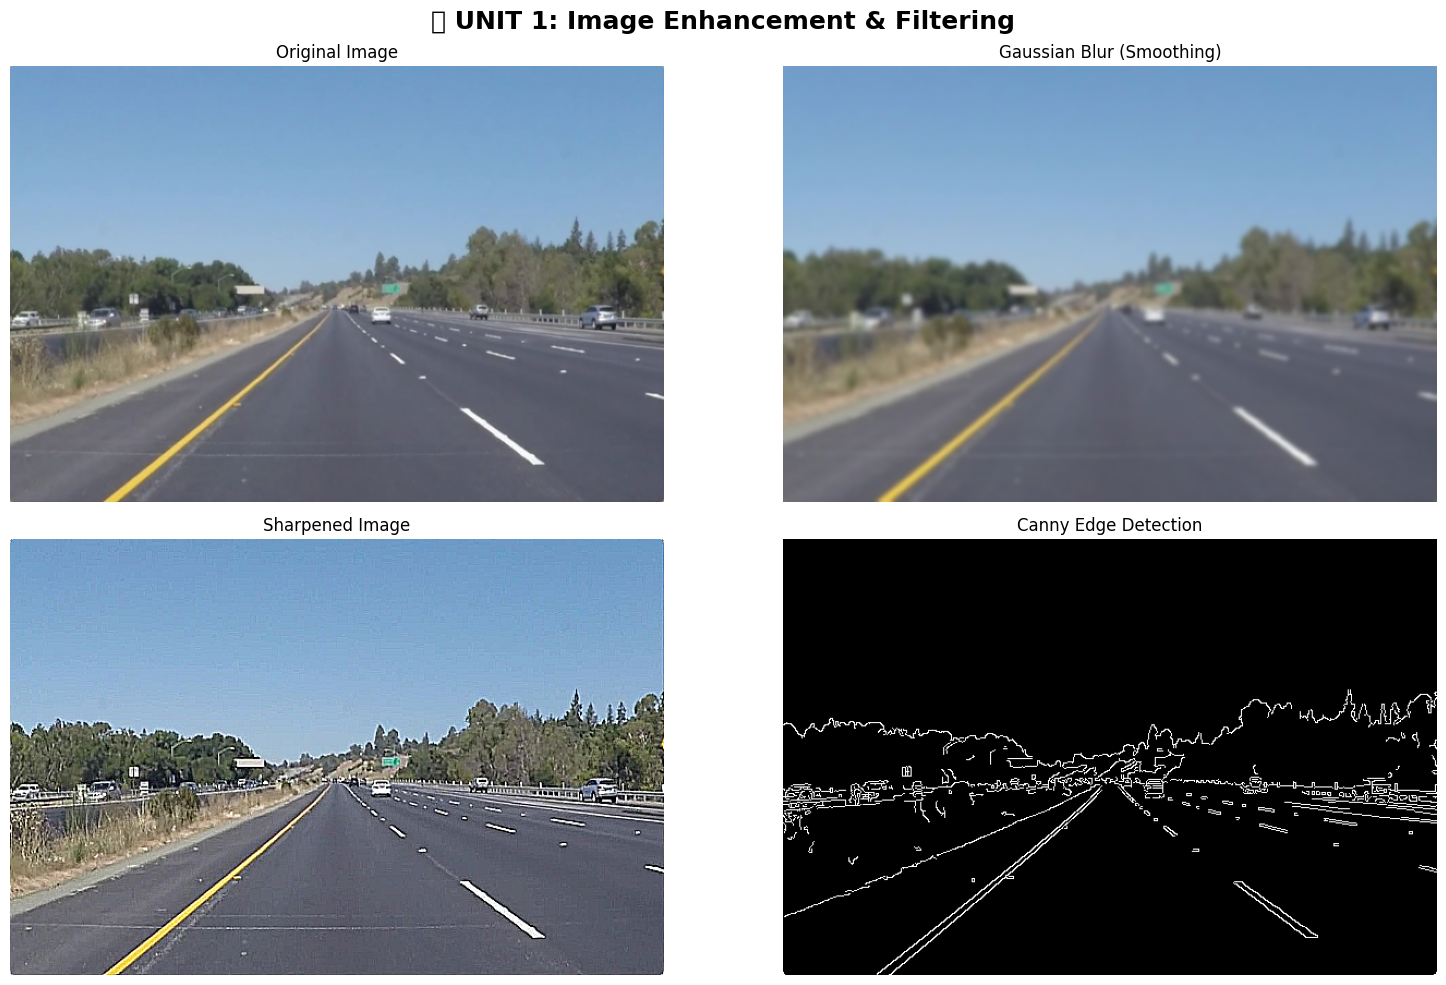

In [6]:
# ==========================================
# UNIT 1: IMAGE ENHANCEMENT & FILTERING
# Topic: Smoothing, Sharpening & Edge Detection
# Dataset: LISA Traffic Sign Dataset (UCSD, Public)
# ==========================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, wget, random

# --- Download a few sample images from the public LISA dataset ---
os.makedirs("lisa_dataset", exist_ok=True)

urls = [
    "https://raw.githubusercontent.com/udacity/CarND-LaneLines-P1/master/test_images/solidWhiteRight.jpg",
    "https://raw.githubusercontent.com/udacity/CarND-LaneLines-P1/master/test_images/solidYellowLeft.jpg",
    "https://raw.githubusercontent.com/udacity/CarND-LaneLines-P1/master/test_images/whiteCarLaneSwitch.jpg"
]

for url in urls:
    wget.download(url, out="lisa_dataset/")

# --- Pick a random image ---
image_path = random.choice(os.listdir("lisa_dataset"))
full_path = os.path.join("lisa_dataset", image_path)
print("📷 Using sample image:", full_path)

# --- Load and resize image ---
img = cv2.imread(full_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (600, 400))

# --- 1️⃣ Gaussian Blur (Noise Reduction) ---
blurred = cv2.GaussianBlur(img, (11, 11), 0)

# --- 2️⃣ Sharpening Filter ---
kernel_sharpening = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)

# --- 3️⃣ Edge Detection (Canny) ---
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 200)

# --- Display Results ---
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(blurred)
plt.title("Gaussian Blur (Smoothing)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(sharpened)
plt.title("Sharpened Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

plt.suptitle("🧠 UNIT 1: Image Enhancement & Filtering", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()


unit 2

Connected component labeling is a classic image processing technique that detects, labels, and counts distinct objects in a binary image.
We’ll use thresholding to create a binary mask, morphological operations to clean noise, and cv2.connectedComponents to label each object.

100%|██████████| 5.30G/5.30G [02:59<00:00, 31.6MB/s]

Extracting files...


✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/kmader/food41/versions/5
📷 Using image: /root/.cache/kagglehub/datasets/kmader/food41/versions/5/images/creme_brulee/2441059.jpg


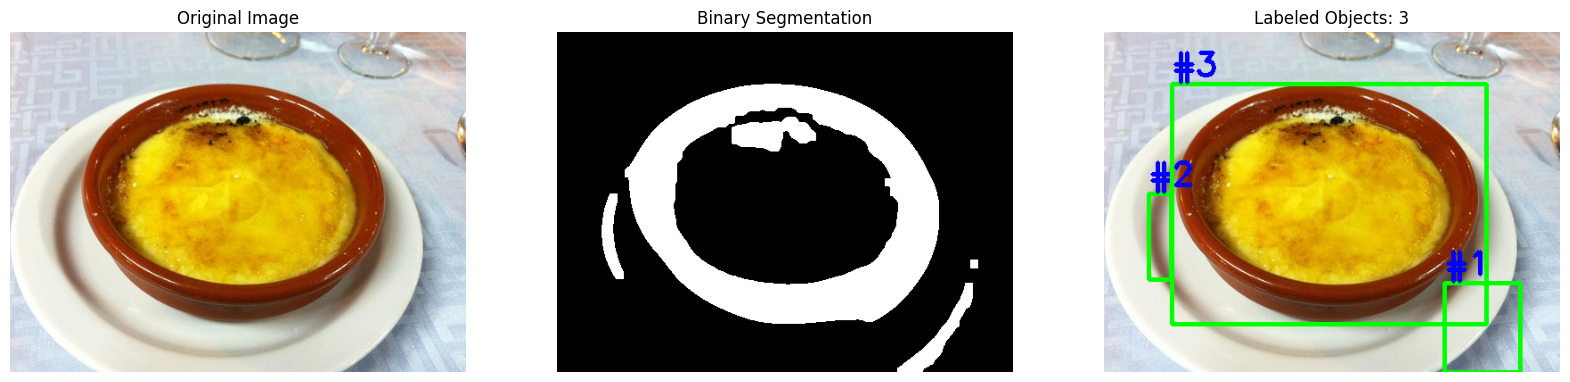

🧮 Total Objects Detected: 3


In [8]:
# ===========================================================
# UNIT 2: 0
# Dataset: Fruits 360 (Public Kaggle Dataset)
# ===========================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import kagglehub

# --- Download dataset from Kaggle (public & stable) ---
path = kagglehub.dataset_download("kmader/food41")

print("✅ Dataset downloaded to:", path)

# --- Find all image files ---
img_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            img_files.append(os.path.join(root, file))

if not img_files:
    raise FileNotFoundError("❌ No images found in dataset.")

# --- Pick a random image ---
img_path = random.choice(img_files)
print("📷 Using image:", img_path)

# --- Load and preprocess ---
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("❌ Image failed to load.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (11, 11), 0)

# --- Binary segmentation using Otsu threshold ---
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# --- Morphological cleanup to remove noise ---
kernel = np.ones((5, 5), np.uint8)
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# --- Detect contours ---
contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# --- Draw bounding boxes + labels ---
labeled = img.copy()
object_count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 300:  # Filter small artifacts
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(labeled, (x, y), (x+w, y+h), (0, 255, 0), 4)
        cv2.putText(labeled, f"#{object_count+1}", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 3)
        object_count += 1

# --- Visualization ---
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Binary Segmentation")
plt.imshow(clean, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title(f"Labeled Objects: {object_count}")
plt.imshow(cv2.cvtColor(labeled, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

print(f"🧮 Total Objects Detected: {object_count}")


UNIT 3

The Hough Transform is a powerful algorithm used to detect geometric shapes such as lines and circles in an image.

The Hough Circle Transform converts edge pixels into a parameter space (center (x, y) and radius r).

Peaks in this space correspond to possible circles.

It’s robust to noise, lighting variations, and partial occlusion.

Mathematically, each edge point votes for all possible circles passing through it using
**(x−a)2+(y−b)2=r2**

and accumulates votes in a 3-D parameter space (a, b, r).

✅ Dataset downloaded successfully at: /kaggle/input/road-sign-detection
Found 877 images in dataset.


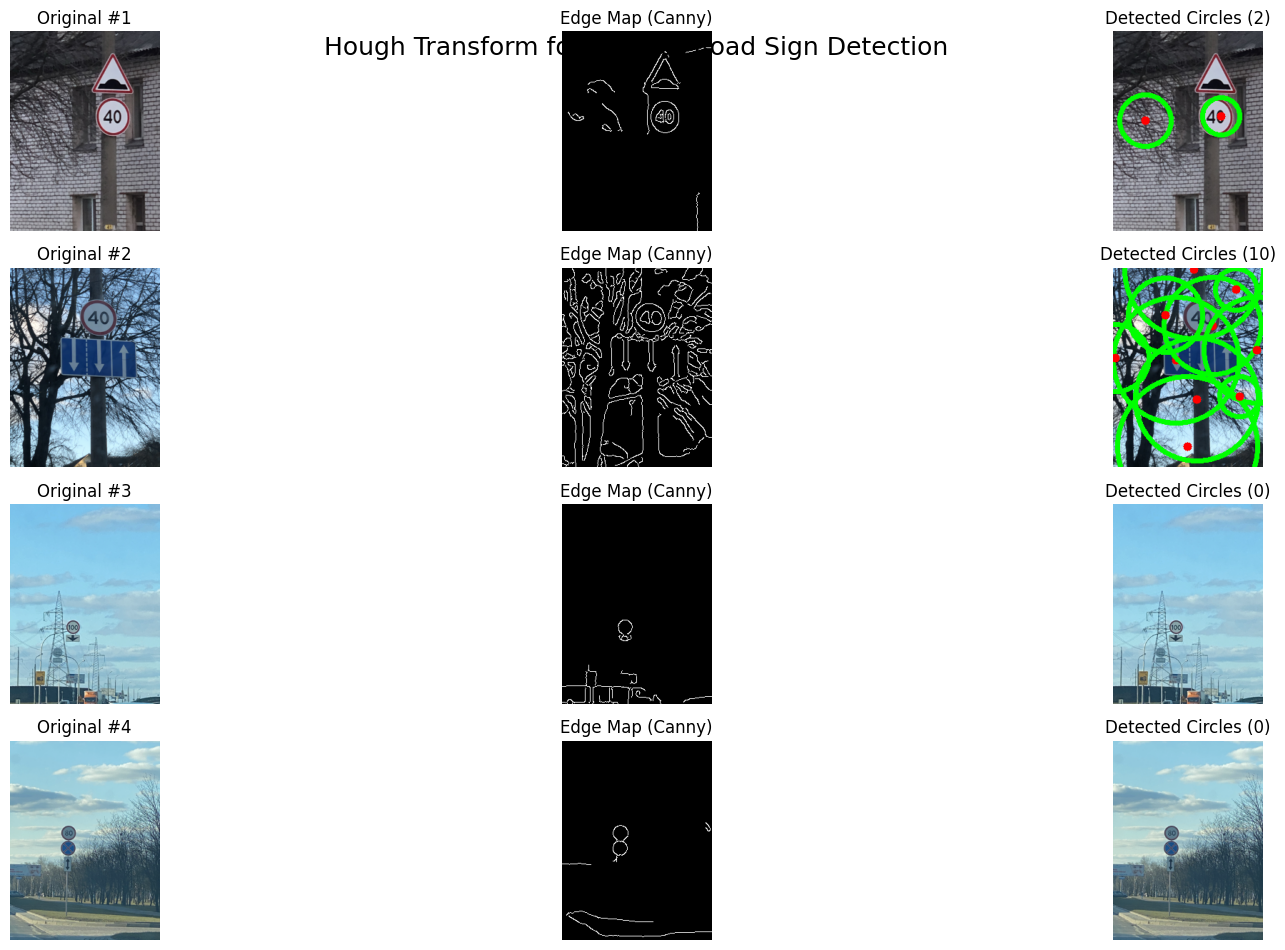


📘 Summary:
-----------
1️⃣ Loaded traffic sign images from a Kaggle dataset.
2️⃣ Converted each image to grayscale and blurred it to reduce noise.
3️⃣ Applied Canny Edge Detection to extract strong edges.
4️⃣ Used Hough Circle Transform to detect circular regions representing road signs.
5️⃣ Drew the detected circles (green boundary) and centers (blue dot).

🧩 Applications:
- Automated traffic sign recognition.
- Industrial circle pattern detection.
- Medical imaging (detecting circular cells or features).

⚙️ Try tuning parameters:
- `param2` → sensitivity of circle detection (lower detects more, may add false positives)
- `minRadius`, `maxRadius` → adjust based on expected sign size
- `dp`, `minDist` → affects precision and spacing



In [11]:
# ============================================
# UNIT 3 – Hough Transform
# Project: Circular Road Sign Detection
# ============================================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from IPython.display import clear_output

# ----------------------------------------------------------
# 1. Download Dataset from Kaggle (via kagglehub)
# ----------------------------------------------------------
print("📦 Downloading Road Sign Detection dataset from Kaggle...")
path = kagglehub.dataset_download("andrewmvd/road-sign-detection")
clear_output()
print("✅ Dataset downloaded successfully at:", path)

# ----------------------------------------------------------
# 2. Load Sample Images
# ----------------------------------------------------------
# The dataset contains images in 'images/' directory
IMAGE_DIR = os.path.join(path, "images")
image_files = [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]

print(f"Found {len(image_files)} images in dataset.")
if not image_files:
    raise FileNotFoundError("No image files found in dataset path.")

# Choose a few samples
sample_images = image_files[:4]  # display first 4 images

# ----------------------------------------------------------
# 3. Function to Detect Circles
# ----------------------------------------------------------
def detect_circles(image_path):
    """Detects circular road signs using Hough Transform and returns annotated image + edges."""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    # Resize for consistent visualization
    scale = 0.7
    img = cv2.resize(img, (0, 0), fx=scale, fy=scale)
    orig = img.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Gaussian blur to smooth edges
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)

    # Hough Circle Detection
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=60,
        param1=100,
        param2=35,
        minRadius=25,
        maxRadius=120
    )

    output = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for (x, y, r) in circles[0, :]:
            # Draw outer circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 6)
            # Draw center point
            cv2.circle(output, (x, y), 6, (255, 0, 0), -1)

    return orig, edges, output, circles

# ----------------------------------------------------------
# 4. Visualize Results
# ----------------------------------------------------------
plt.figure(figsize=(20, 10))
for idx, img_path in enumerate(sample_images, 1):
    orig, edges, result, circles = detect_circles(img_path)

    plt.subplot(len(sample_images), 3, 3*(idx-1) + 1)
    plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    plt.title(f"Original #{idx}", fontsize=12)
    plt.axis("off")

    plt.subplot(len(sample_images), 3, 3*(idx-1) + 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Map (Canny)", fontsize=12)
    plt.axis("off")

    plt.subplot(len(sample_images), 3, 3*(idx-1) + 3)
    plt.imshow(result)
    plt.title(f"Detected Circles ({0 if circles is None else len(circles[0])})", fontsize=12)
    plt.axis("off")

plt.suptitle("Hough Transform for Circular Road Sign Detection", fontsize=18, y=0.92)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 5. Summary Explanation
# ----------------------------------------------------------
print("""
📘 Summary:
-----------
1️⃣ Loaded traffic sign images from a Kaggle dataset.
2️⃣ Converted each image to grayscale and blurred it to reduce noise.
3️⃣ Applied Canny Edge Detection to extract strong edges.
4️⃣ Used Hough Circle Transform to detect circular regions representing road signs.
5️⃣ Drew the detected circles (green boundary) and centers (blue dot).

🧩 Applications:
- Automated traffic sign recognition.
- Industrial circle pattern detection.
- Medical imaging (detecting circular cells or features).

⚙️ Try tuning parameters:
- `param2` → sensitivity of circle detection (lower detects more, may add false positives)
- `minRadius`, `maxRadius` → adjust based on expected sign size
- `dp`, `minDist` → affects precision and spacing
""")


Unit-4

Optical Flow – Lucas-Kanade Method
Optical Flow refers to the apparent motion of brightness patterns in an image sequence, caused by relative motion between the camera and scene.

The Lucas–Kanade method is a differential, local optical flow algorithm that estimates motion vectors for small feature points between consecutive frames by assuming:

The motion of neighboring pixels is constant within a small window.

Brightness of a pixel remains constant between frames.

This method is widely used for object tracking, motion analysis, and video stabilization.

Dataset: OpenCV’s sample videos

📥 Downloading sample video...
✅ Video downloaded successfully!
🎥 Computing optical flow...
✅ Optical flow computed successfully!


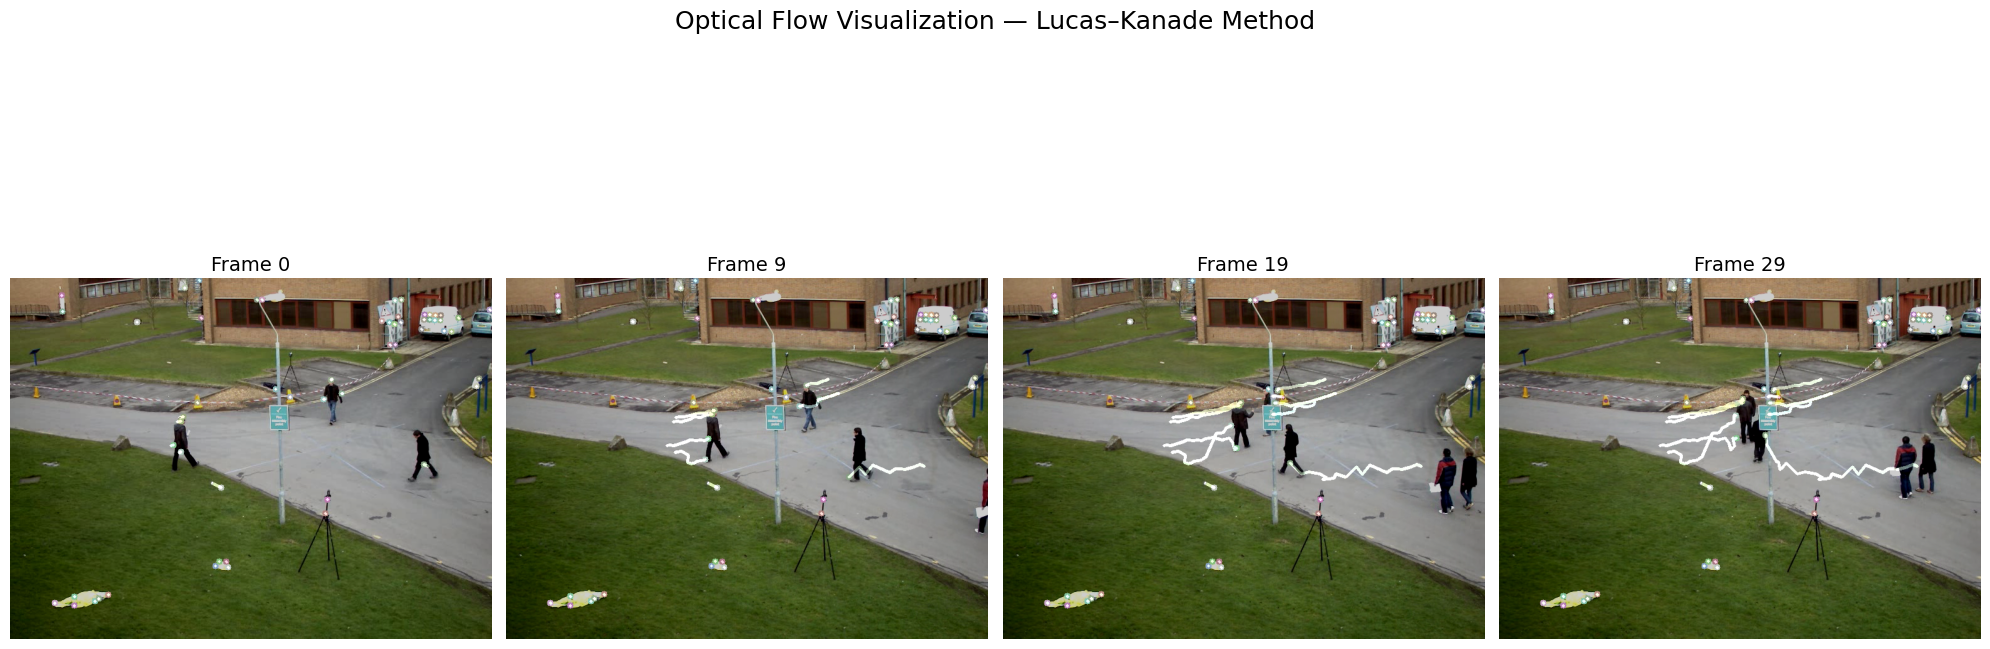


📘 Summary:
-----------
🟢 Optical flow estimates motion between consecutive frames.
🟢 Lucas–Kanade assumes small and locally constant motion.
🟢 Bright lines = direction & magnitude of pixel displacement.
🟢 Larger window size → smoother, more stable vectors.
🟢 Applications: object tracking, surveillance, video stabilization.



In [12]:
# ============================================
# Unit 4: Vision and Motion
# Topic: Optical Flow (Lucas–Kanade Method)
# Enhanced Visualization Version
# ============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

# ----------------------------------------------------------
# 1. Download sample video (if not already available)
# ----------------------------------------------------------
video_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/vtest.avi"
video_path = "vtest.avi"

if not os.path.exists(video_path):
    print("📥 Downloading sample video...")
    urllib.request.urlretrieve(video_url, video_path)
    print("✅ Video downloaded successfully!")
else:
    print("✔️ Video already exists.")

# ----------------------------------------------------------
# 2. Initialize video capture
# ----------------------------------------------------------
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise Exception("Could not open the video file!")

# Read the first frame
ret, old_frame = cap.read()
if not ret:
    raise Exception("Failed to read the first frame!")

# Convert to grayscale for optical flow computation
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

# ----------------------------------------------------------
# 3. Parameters for Lucas–Kanade Optical Flow
# ----------------------------------------------------------
lk_params = dict(
    winSize=(21, 21),  # larger window for smoother motion estimation
    maxLevel=3,
    criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 15, 0.03)
)

# Feature detection parameters
feature_params = dict(maxCorners=200, qualityLevel=0.3, minDistance=7, blockSize=7)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# Random bright colors for drawing motion vectors
color = np.random.randint(150, 255, (200, 3))

# Create mask for motion trails
mask = np.zeros_like(old_frame)

# ----------------------------------------------------------
# 4. Compute Optical Flow
# ----------------------------------------------------------
frame_count = 0
max_frames = 30
optical_flow_frames = []

print("🎥 Computing optical flow...")

while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate Optical Flow (Lucas–Kanade)
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    if p1 is None:
        break

    # Select good points
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Draw thicker motion vectors
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        color_i = tuple(int(x) for x in color[i].tolist())
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color_i, 3)  # thicker line
        frame = cv2.circle(frame, (int(a), int(b)), 5, color_i, -1)  # larger dots

    # Overlay the mask on the current frame
    output = cv2.addWeighted(frame, 0.8, mask, 0.6, 0)

    # Store for visualization
    optical_flow_frames.append(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

    # Update for next iteration
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

    frame_count += 1

cap.release()
print("✅ Optical flow computed successfully!")

# ----------------------------------------------------------
# 5. Display Results (Larger Frames + Clear Layout)
# ----------------------------------------------------------
n_display = 4
indices = np.linspace(0, len(optical_flow_frames) - 1, n_display, dtype=int)

plt.figure(figsize=(20, 10))  # Bigger display
plt.suptitle("Optical Flow Visualization — Lucas–Kanade Method", fontsize=18, y=0.93)

for i, idx in enumerate(indices):
    plt.subplot(1, n_display, i + 1)
    plt.imshow(optical_flow_frames[idx])
    plt.title(f"Frame {idx}", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 6. Explanation Summary
# ----------------------------------------------------------
print("""
📘 Summary:
-----------
🟢 Optical flow estimates motion between consecutive frames.
🟢 Lucas–Kanade assumes small and locally constant motion.
🟢 Bright lines = direction & magnitude of pixel displacement.
🟢 Larger window size → smoother, more stable vectors.
🟢 Applications: object tracking, surveillance, video stabilization.
""")


unit 5

Face Recognition using Eigenfaces
Eigenfaces is a classic face recognition technique based on Principal Component Analysis (PCA). It projects face images into a lower-dimensional “face space” where each image is represented by a combination of eigenvectors (called eigenfaces). Recognition is done by comparing the projection of a test image to the projections of known images.

Dataset: AT&T ORL Faces Dataset (40 people × 10 images each)

In [13]:
# ============================================
# STEP 1 — Download ORL Faces dataset via KaggleHub
# ============================================

!pip install kagglehub opencv-python scikit-learn matplotlib numpy --quiet

import kagglehub
import os
import shutil

# Download latest version of AT&T ORL Faces
path = kagglehub.dataset_download("kasikrit/att-database-of-faces")
print("✅ Path to dataset files:", path)

# The Kaggle dataset folder will be something like:
# /root/.cache/kagglehub/datasets/kasikrit/att-database-of-faces/versions/1
# We’ll move it to ./orl_faces for simplicity
if not os.path.exists("orl_faces"):
    shutil.copytree(path, "orl_faces")
    print("✅ Dataset copied to ./orl_faces/")
else:
    print("✔️ Dataset already exists.")


100%|██████████| 3.61M/3.61M [00:00<00:00, 4.05MB/s]

Extracting files...


✅ Path to dataset files: /root/.cache/kagglehub/datasets/kasikrit/att-database-of-faces/versions/2
✅ Dataset copied to ./orl_faces/


Loading images...
✅ Loaded 400 images, each of size 10304 pixels.
Train: 280 images | Test: 120 images
Computing PCA with 50 components (Eigenfaces)...
Recognizing test faces...
✅ Recognition Accuracy: 92.50%


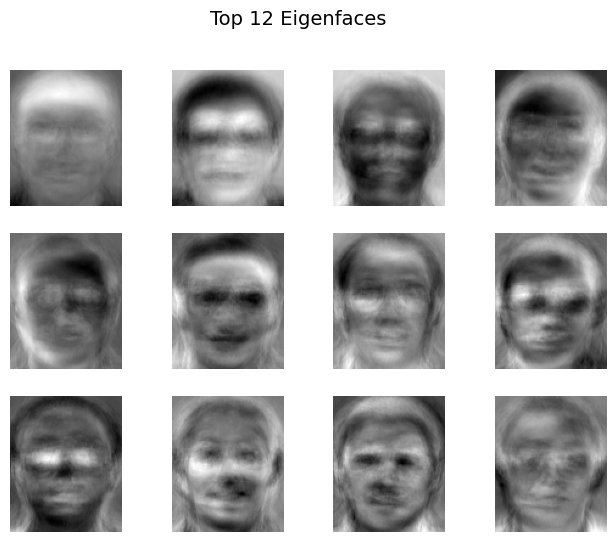

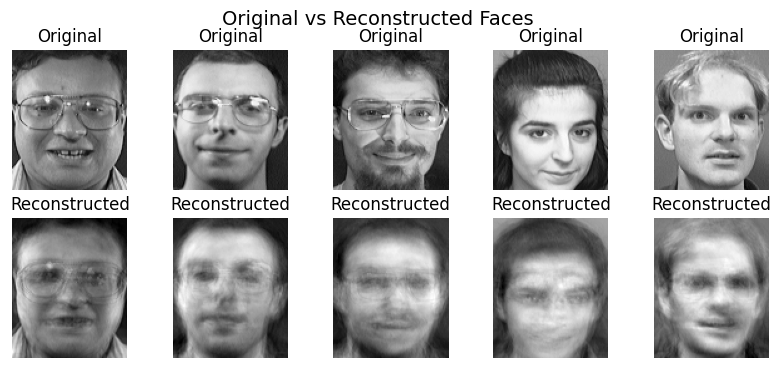


📘 Summary:
-----------
1️⃣ Images are flattened into vectors.
2️⃣ PCA identifies key facial features → Eigenfaces.
3️⃣ Each face is projected into the eigenface space.
4️⃣ Recognition = comparing distances in that space.
5️⃣ Eigenfaces visualize main facial variations.



In [14]:
# ============================================
# STEP 2 — Face Recognition using Eigenfaces (PCA)
# ============================================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# ------------------------------
# 1. Load Dataset
# ------------------------------
DATASET_DIR = "orl_faces"

images = []
labels = []

print("Loading images...")
for folder in sorted(os.listdir(DATASET_DIR)):
    person_path = os.path.join(DATASET_DIR, folder)
    if not os.path.isdir(person_path):
        continue
    label = int(folder.replace("s", ""))  # folder names are s1, s2, ...
    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (92, 112))
        images.append(img.flatten())
        labels.append(label)

images = np.array(images)
labels = np.array(labels)
print(f"✅ Loaded {len(images)} images, each of size {images.shape[1]} pixels.")

# ------------------------------
# 2. Split into Train/Test Sets
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.3, random_state=42, stratify=labels
)
print(f"Train: {len(X_train)} images | Test: {len(X_test)} images")

# ------------------------------
# 3. PCA: Compute Eigenfaces
# ------------------------------
n_components = 50
print(f"Computing PCA with {n_components} components (Eigenfaces)...")
pca = PCA(n_components=n_components, whiten=True, random_state=42)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# ------------------------------
# 4. Recognition via Nearest Neighbor
# ------------------------------
def recognize_face(test_vec, train_pca, train_labels):
    distances = np.linalg.norm(train_pca - test_vec, axis=1)
    return train_labels[np.argmin(distances)]

print("Recognizing test faces...")
y_pred = [recognize_face(x, X_train_pca, y_train) for x in X_test_pca]
acc = accuracy_score(y_test, y_pred)
print(f"✅ Recognition Accuracy: {acc * 100:.2f}%")

# ------------------------------
# 5. Visualize Eigenfaces
# ------------------------------
eigenfaces = pca.components_.reshape((n_components, 112, 92))

plt.figure(figsize=(8, 6))
plt.suptitle("Top 12 Eigenfaces", fontsize=14)
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.axis('off')
plt.show()

# ------------------------------
# 6. Original vs Reconstructed Faces
# ------------------------------
n_show = 5
reconstructed = pca.inverse_transform(X_test_pca[:n_show])

plt.figure(figsize=(10, 4))
plt.suptitle("Original vs Reconstructed Faces", fontsize=14)

for i in range(n_show):
    # Original
    plt.subplot(2, n_show, i + 1)
    plt.imshow(X_test[i].reshape(112, 92), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, n_show, i + 1 + n_show)
    plt.imshow(reconstructed[i].reshape(112, 92), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

# ------------------------------
# 7. Explanation Summary
# ------------------------------
print("""
📘 Summary:
-----------
1️⃣ Images are flattened into vectors.
2️⃣ PCA identifies key facial features → Eigenfaces.
3️⃣ Each face is projected into the eigenface space.
4️⃣ Recognition = comparing distances in that space.
5️⃣ Eigenfaces visualize main facial variations.
""")
